## Load Data


In [16]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', index_col=0)
df

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,,,,,,,,,
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing/Visualization


In [18]:
df.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Describing data

In [19]:
print(df.isna().sum())

volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Finding empty values(no empty value)

In [20]:
df.corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166


Correlation of columns

In [21]:
df.groupby('quality').mean()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,
3,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Find means grouped by quality

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [22]:
sns.countplot(df['quality'])
plt.show()

In [23]:
sns.countplot(df['pH'])
plt.show()

KeyError: ignored

In [ ]:
sns.countplot(df['alcohol'])
plt.show()

In [ ]:
sns.countplot(df['fixed acidity'])
plt.show()

In [ ]:
sns.countplot(df['volatile acidity'])
plt.show()

In [ ]:
sns.countplot(df['citric acid'])
plt.show()

In [39]:
sns.countplot(df['density'])
plt.show()

KeyError: ignored

<Axes: xlabel='quality', ylabel='Density'>

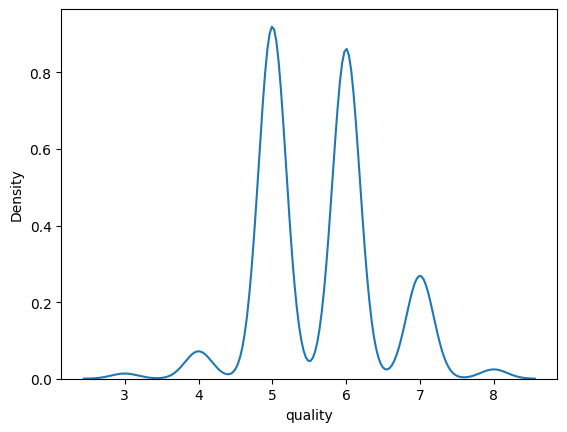

In [38]:
sns.kdeplot(df.query('quality > 2').quality)

In [ ]:
sns.distplot(df['alcohol'])

In [ ]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

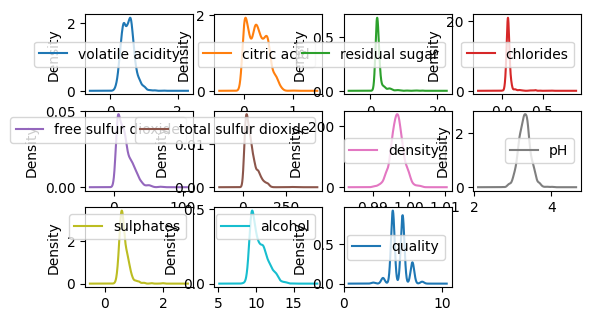

In [37]:
df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

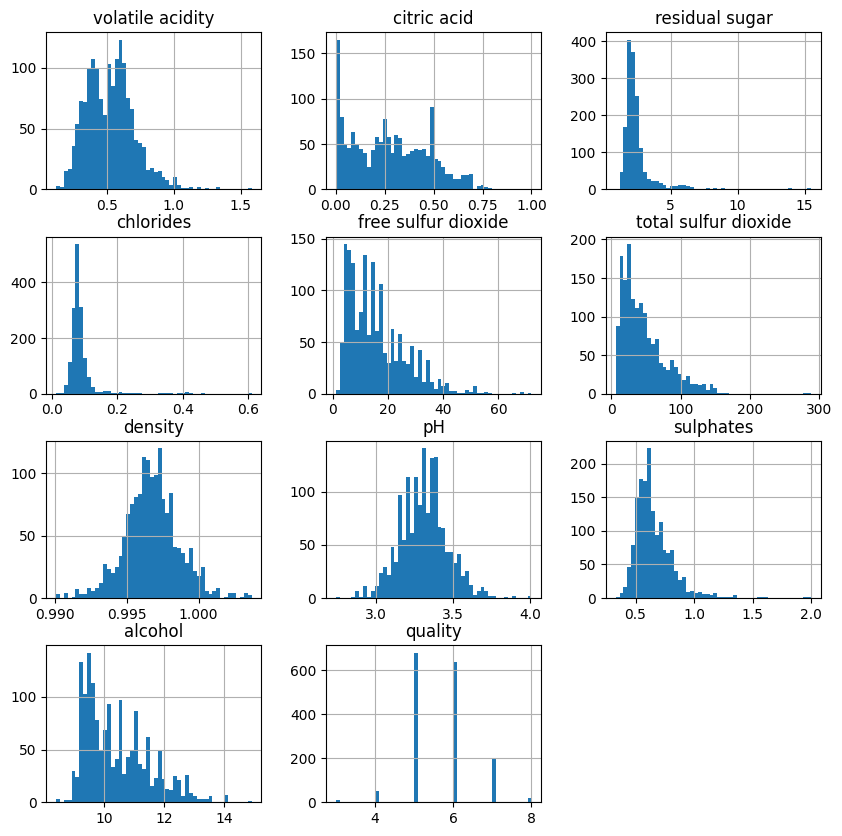

In [36]:
df.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

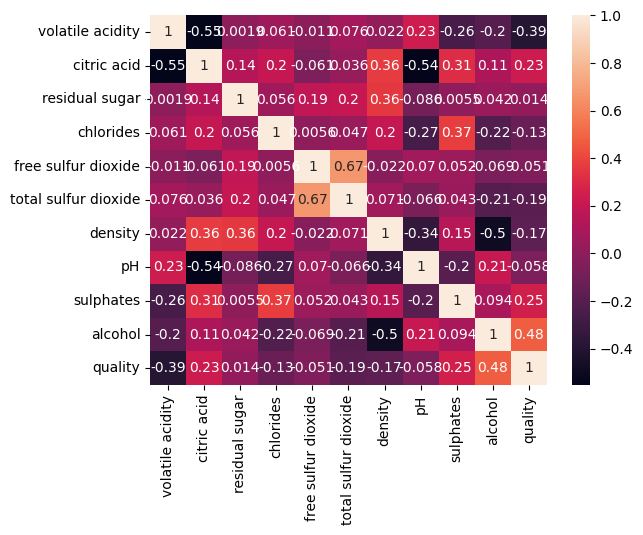

In [35]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
sns.pairplot(df)

## Data Preperation


#### X & Y

In [24]:
y = df["quality"]
y

fixed acidity
7.4     5
7.8     5
7.8     5
11.2    6
7.4     5
       ..
6.2     5
5.9     6
6.3     6
5.9     5
6.0     6
Name: quality, Length: 1599, dtype: int64

In [25]:
X = df.drop("quality", axis = 1)
X

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0


### Splitting Testing and Training

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, 
                                                    random_state= 100)
X_train


,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5
8.0,0.480,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4
7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4
7.2,0.450,0.15,2.0,0.078,10.0,28.0,0.99609,3.29,0.51,9.9
7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5
...,...,...,...,...,...,...,...,...,...,...
8.6,0.380,0.36,3.0,0.081,30.0,119.0,0.99700,3.20,0.56,9.4
10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.00040,3.28,0.98,9.9
8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1


In [27]:
X_test

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,,,,,,,,,,
7.8,0.700,0.06,1.9,0.079,20.0,35.0,0.99628,3.40,0.69,10.900000
7.9,0.190,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.200000
6.7,0.540,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.800000
6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.800000
...,...,...,...,...,...,...,...,...,...,...
7.3,0.550,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.000000
10.2,0.440,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.000000
7.8,0.560,0.19,2.0,0.081,17.0,108.0,0.99620,3.32,0.54,9.500000


## Model Building


### Linear Regression Part


Training the Model

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

Apply to Predictions

In [29]:
y_lrtrain_pred = lr.predict(X_train)
y_lrtest_pred = lr.predict(X_test)
y_lrtrain_pred
y_lrtest_pred

array([5.66111895, 6.37685034, 5.31965077, 4.87308707, 5.58291837,
       6.75604495, 4.9499825 , 6.07588632, 6.03107734, 6.51495315,
       6.51100285, 5.29583646, 5.68446548, 5.10885776, 5.74165284,
       4.77171231, 6.05299435, 5.0431839 , 5.50597021, 5.39264555,
       5.93617263, 5.35855495, 5.72908108, 5.93455685, 6.22057444,
       6.05401084, 5.90977956, 5.18353828, 5.37382596, 5.58254442,
       5.19709255, 5.40930972, 6.125231  , 5.90923751, 5.36469548,
       5.89043318, 5.80044531, 5.41860922, 5.18401986, 4.99815136,
       4.95377718, 6.13225701, 5.58210473, 5.74082045, 5.95541242,
       5.75540563, 5.42322382, 6.30297565, 4.85222745, 6.19987527,
       5.49788362, 5.38130256, 5.70290843, 5.57524756, 6.08739648,
       6.1893291 , 6.49535612, 6.07206829, 5.2290569 , 5.39533699,
       6.67691325, 5.53456032, 6.02432955, 6.55039633, 5.40999329,
       4.72667371, 5.58365784, 5.47206552, 4.89511791, 5.9913187 ,
       5.47733183, 6.68608748, 6.72929352, 6.53104897, 6.39463

Evaluate
performance

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lrtrain_pred)

lr_train_r2 = r2_score(y_train, y_lrtrain_pred)

lr_test_mse = mean_squared_error(y_test, y_lrtest_pred)

lr_test_r2 = r2_score(y_test, y_lrtest_pred)

lr.result = pd.DataFrame([lr_train_mse,lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr.result

,0,1,2,3
0,0.418864,0.359943,0.406379,0.356828


### Random Forest


In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 2, random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [32]:
y_rftrain_pred = rf.predict(X_train)
y_rftest_pred = rf.predict(X_test)
y_rftrain_pred
y_rftest_pred

array([5.82913557, 6.25778292, 5.45417201, 5.47718964, 5.8392334 ,
       6.44222096, 5.20642161, 6.05815594, 5.98021819, 6.00260425,
       6.44222096, 5.32591484, 5.62359772, 5.25433601, 5.80644163,
       5.25857212, 5.79852408, 5.20642161, 5.31315588, 5.31939686,
       6.13433019, 5.43708149, 5.76062243, 6.31805386, 6.0990199 ,
       6.3218404 , 5.79753672, 5.4169306 , 5.49970861, 5.65800631,
       5.27542842, 5.47718964, 5.9642152 , 6.12874027, 5.45417201,
       5.8212639 , 5.69593839, 5.47308477, 5.36008099, 5.26244787,
       5.20642161, 6.12489096, 5.78944815, 5.70237133, 5.62807635,
       5.44135601, 5.4164559 , 5.98117312, 5.43748026, 5.94067884,
       5.22751401, 5.28373914, 5.75751704, 5.58139851, 5.7189063 ,
       6.11938812, 6.02675444, 5.90437647, 5.46253017, 5.44567996,
       6.44810336, 5.42796062, 5.90819054, 6.44222096, 5.47305624,
       5.39148775, 5.31315588, 5.47311518, 5.20642161, 5.68911911,
       5.42517036, 6.38573973, 6.30110532, 6.14472068, 6.00848

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rftrain_pred)

rf_train_r2 = r2_score(y_train, y_rftrain_pred)

rf_test_mse = mean_squared_error(y_test, y_rftest_pred)

rf_test_r2 = r2_score(y_test, y_rftest_pred)

rf.result = pd.DataFrame([rf_train_mse,rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf.result

,0,1,2,3
0,0.438368,0.330139,0.425162,0.3271


### RForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
score_ytest = accuracy_score(y_test,y_pred2)
print("Accuracy Score:", score_ytest)
model2_result = pd.DataFrame(['RFC', score_ytest]).transpose()
model2_result.columns = ["Method", 'y-Test score']
model2_result

Accuracy Score: 0.7604166666666666


,Method,y-Test score
0,RFC,0.760417
